# **1. K-Means 알고리즘 이해**

### **K-Means를 이용한 붓꽃 데이터 세트 군집화**

- 붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종을 분류하는 데이터 세트
- 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인

In [1]:
### 필요한 library import

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
### 데이터 세트 load
iris = load_iris()

In [3]:
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환

irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
### 3개의 그룹으로 군집화

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,random_state = 0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [5]:
### 각 데이터가 어떤 중심에 속하는지 확인하기

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
### 제대로 군집화가 되었는지 확인하기

irisDF['target'] = iris.target # 붓꽃 데이터 세트의 target 값
irisDF['cluster'] = kmeans.labels_ # labels_ 값

iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [7]:
### PCA를 이용해 4차원 -> 2차원으로 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


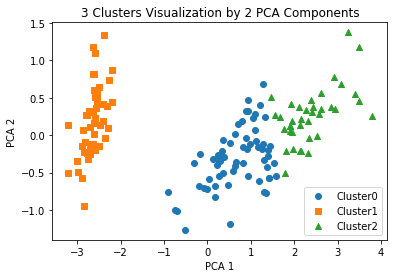

In [8]:
### 군집화 시각화

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x = irisDF.loc[marker0_ind,'pca_x'], y = irisDF.loc[marker0_ind,'pca_y'], marker = 'o',label = 'Cluster0') 
plt.scatter(x = irisDF.loc[marker1_ind,'pca_x'], y = irisDF.loc[marker1_ind,'pca_y'], marker = 's',label = 'Cluster1')
plt.scatter(x = irisDF.loc[marker2_ind,'pca_x'], y = irisDF.loc[marker2_ind,'pca_y'], marker = '^',label = 'Cluster2')

plt.legend()

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- Cluster1의 경우 명확히 다른 군집과 잘 분리돼 있음
- Cluster0과 Cluster2는 상당 수준 분리돼 있지만, ,Cluster1만큼 명확하게는 분리되어 있지 않음

### **군집화 알고리즘 테스트를 위한 데이터 생성**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [10]:
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0) 
print(X.shape, y.shape)

(200, 2) (200,)


In [11]:
# y target 값의 분포를 확인

unique, counts = np.unique(y, return_counts = True)
print(unique,counts)

# 3개의 cluster의 값은 [0 1 2]이며 각각 67, 67, 66개로 균일

[0 1 2] [67 67 66]


In [12]:
### 데이터를 DataFrame으로 변경

import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


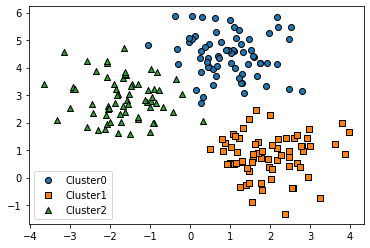

In [13]:
### 시각화
# make_blob()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인

target_list = np.unique(y)

# 각 target별 scatter plot 의 marker 값들
markers = ['o', 's', '^', 'P','D','H','x']

# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성

for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker = markers[target], label = "Cluster"+str(target))

plt.legend()
plt.show()

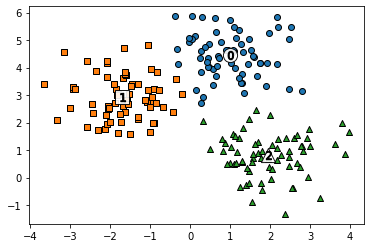

In [14]:
### 군집화 수행 후 군집별로 시각화

# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', 
                marker = markers[label])
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

- make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미 -> 서로 다른 값으로 매핑될 수 있음
> 산점도의 마커가 서로 다를 수 있음

In [15]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

# 대부분 잘 매핑됨

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# **2. 군집 평가(Cluster Evaluation)**

### **붗꽃 데이터 세트를 이용한 군집 평가**

In [16]:
### 라이브러리 import

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [17]:
### Data Loading

iris = load_iris()

feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names) # dataFrame 형태로 변경

In [18]:
### 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

In [19]:
### 군집 평가

# iris 의 모든 개별 데이터의 실루엣 계수값 구하기
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [20]:
# 군집별 평균 실루엣 계수 값 파악하기
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 1번 군집의 실루엣 계수 평균값에 비해 2,3번 군집의 실루엣 계수 평균값이 상대적으로 낮음
> 평균 실루엣 계수가 낮게 나온다.

### **2-3. 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법**

In [21]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 

def visualize_silhouette(cluster_lists, X_features): 
    # 라이브러리 import
    from sklearn.datasets import make_blobs # 간단한 데이터 생성기
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 개수들을 리스트로 받아서, 각 개수별로 클러스터링을 적용하고 실루엣 계수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows = 1, ncols = n_cols)
    
    ### 리스트에 기재된 클러스터링 갯수들을 차례로 iteration하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # K-Means 클러스터링을 수행
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        # 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

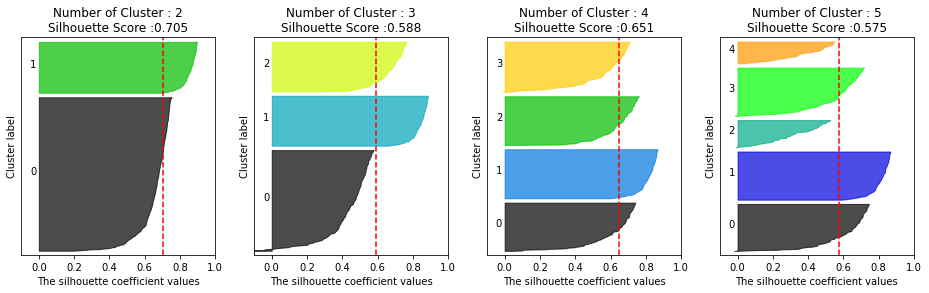

In [22]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수가 2개, 3개, 4개, 5개일 때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

- 군집의 개수를 4개로 설정할 때 가장 적절해 보인다. 

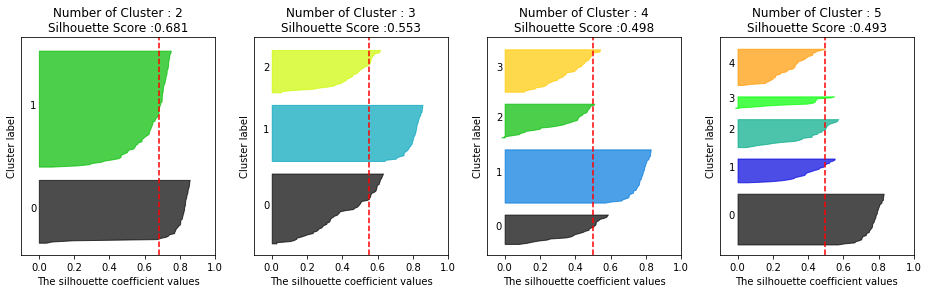

In [23]:
### 붓꽃 데이터를 이용해 K-Means 수행

from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

- 군집의 개수를 2개로 설정할 때 가장 적절해 보인다.

# **3. 평균 이동(Mean Shift)**

In [24]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [25]:
### 데이터 생성

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

In [26]:
### 평균 이동

meanshift= MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [27]:
### bandwidth를 높여 군집 개수 줄이기

meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [28]:
### bandwidth 최적화하기

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [29]:
### 최적화된 bandwidth를 평균 이동 입력값으로 적용해 군집화 수행하기

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

# 군집화
meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


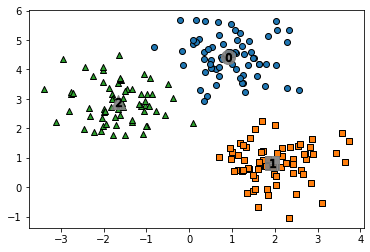

In [30]:
### 시각화

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [31]:
### target값과 군집 label 값 비교

print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


# **4. GMM**

### **GMM을 이용한 붓꽃 데이터 세트 군집화**

In [32]:
### Data Loading

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [33]:
from sklearn.mixture import GaussianMixture

# 군집화
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [34]:
### K-Means로 군집화 수행해보기

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)

irisDF['kmeans_cluster'] = kmeans_cluster_labels

iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


- 붓꽃 데이터 세트가 GMM 군집화에 더 효과적

### **4-3. GMM vs K-Means**

In [35]:
### 클러스터링 결과를 담은 DataFrame과 사이킷런의 Cluster 객체 등을 인자로 받아 클러스터링 결과를 시각화하는 함수  

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter = True):
    if iscenter:
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    isNoise = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], s = 70,\
                    edgecolor = 'k', marker = markers[label], label = cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

- clusterobj
  - 사이킷런의 군집 수행 객체
  - KMeans나 GaussianMixture의 fit()와 predict()로 군집화를 완료한 객체
  - 만약 군집화 결과의 시각화가 아닌 make_blobs()로 생성한 데이터의 시각화인 경우 None 입력
- dataframe: feature 데이터 셋과 label 값을 가진 DataFrame
- label_name
  - 군집화 결과 시각화 => dataframe 내의 군집화 label 컬럼 명
  - make_blobs() 결과 시각화 => dataframe 내의 target 컬럼 명
- iscenter: 사이킷런 Cluster 객체가 군집 좌표 제공 시 True, 아니면 False

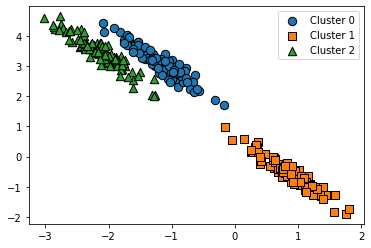

In [36]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std = 0.5 생성
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 셋과 make_blobs( )의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 셋을 target 별로 다른 marker로 표시하여 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

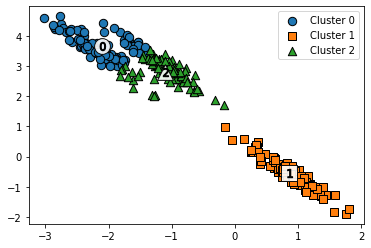

In [37]:
### K-Means 군집화 적용하기

# 3개의 Cluster 기반 K-means를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

- 군집화가 잘 이루어지지 않는다.

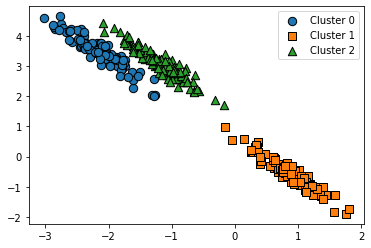

In [38]:
### GMM으로 군집화 수횅

# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

- 데이터가 분포된 방향에 따라 정확하게 군집화됨

In [39]:
### 군집화 효율 비교

print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# **5. DBSCAN**

### **DBSCAN 적용하기_ 붓꽃 데이터 세트**

In [40]:
### Data Loading

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
irisDF['target'] = iris.target

In [41]:
### 군집화

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- dbscan_cluster == -1: 노이즈에 속하는 군집


In [42]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

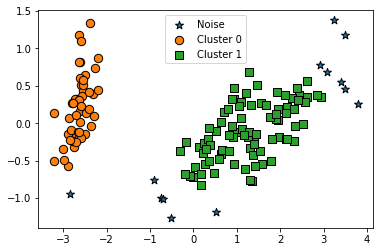

In [43]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 별표(★)로 표현된 값은 모두 노이즈

In [45]:
### EPS: 0.6 -> 0.8(증가)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


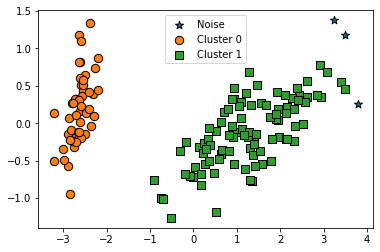

In [46]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 데이터의 개수 감소

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


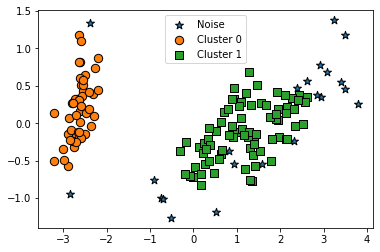

In [47]:
### min_samples: 16으로 증가

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 데이터의 개수 증가

### **DBSCAN 적용하기 - make_circles() 데이터 세트**

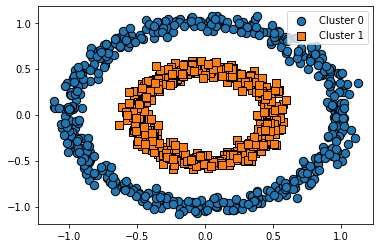

In [48]:
### 원형 2차원 데이터 세트 생성

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

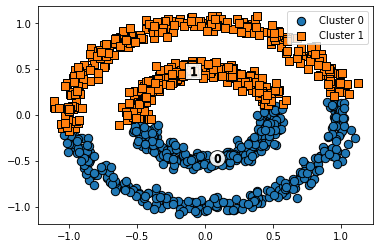

In [49]:
### K-Means(거리 기반 군집화)로 make_circles( ) 데이터 셋을 클러스터링 수행

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

- 거리 기반 군집화로는 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

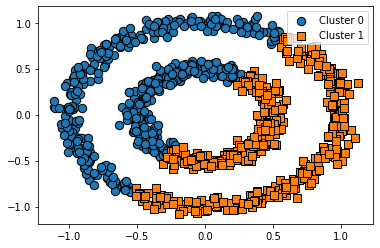

In [50]:
### GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

- 복잡한 형태의 데이터 세트에서는 군집화가 제대로 이루어지지 않음

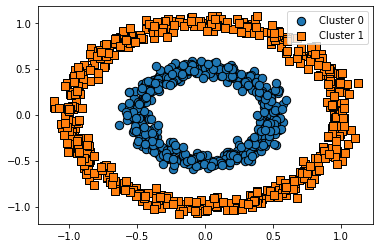

In [51]:
### DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

- 원하는 방향으로 정확히 군집화가 됐음을 알 수 있음